In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Fish_dataset.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


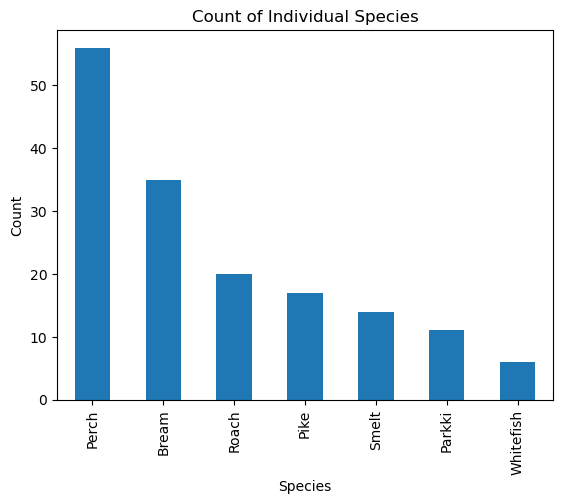

In [3]:
# Q1. Plot a bar chart showing the count of individual species?
species_count = df['Species'].value_counts()
species_count.plot(kind='bar')

plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of Individual Species')
plt.show()

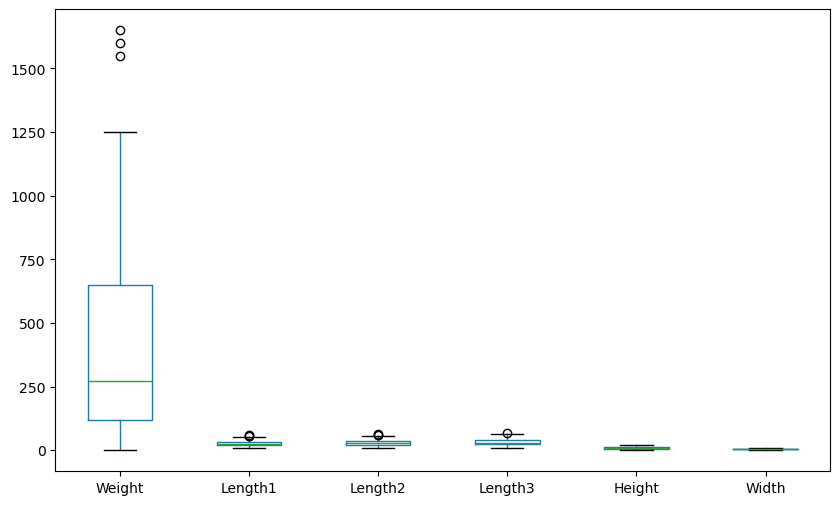

In [4]:
df.boxplot(figsize=(10,6), grid=False)
plt.show()

In [5]:
for cols in df.columns:
    if df[cols].dtype == object:
        continue
    else:
        Q1 = df[cols].quantile(q=0.25)
        Q3 = df[cols].quantile(q=0.75)
        IQR = Q3-Q1

        low = Q1-1.5*(IQR)
        high = Q3+1.5*(IQR)

        # Remove outliers by dropping the rows
        df = df[(df[cols] >= low) & (df[cols] <= high)]

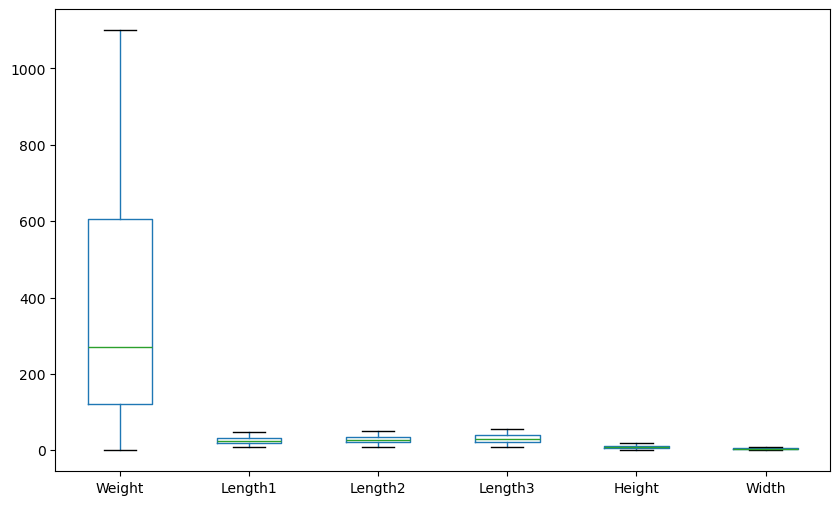

In [6]:
df.boxplot(figsize=(10,6), grid=False)
plt.show()

In [7]:
x= df[['Length1', 'Length2', 'Length3', 'Height','Width']].values
y= df['Weight'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=40)
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)
coff = LR.coef_
intercept = LR.intercept_
y_train_pred= LR.predict(X_train)
y_test_pred= LR.predict(X_test)
from sklearn.metrics import mean_squared_error
train=mean_squared_error(y_train,y_train_pred) 
test=mean_squared_error(y_test,y_test_pred) 
print('R2_train= ',train,'\nR2_test= ',test,'\ncoefficent= ',coff,'\nintercept= ',intercept) 

R2_train=  8301.692054361698 
R2_test=  12102.236456758103 
coefficent=  [114.20110731 -53.42918887 -40.81363426  40.59671118  50.39428825] 
intercept=  -405.20737520802555


#### 2/12/2023

In [8]:
x= df['Width'].values.reshape(-1, 1)
y= df['Weight'].values
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(x)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=40)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
Reg_train_predict=reg.predict(X_train)
Reg_test_predict=reg.predict(X_test)
from sklearn import metrics
print("R score Train",metrics.r2_score(y_train,Reg_train_predict))
print("R score Test",metrics.r2_score(y_test,Reg_test_predict))

R score Train 0.8603761170268922
R score Test 0.8415206940340864


In [18]:
x= df[['Length1','Length2','Length3','Height','Width']].values
y= df['Weight'].values
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(x)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=40)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
Reg_train_predict=reg.predict(X_train)
Reg_test_predict=reg.predict(X_test)
from sklearn import metrics
print("R score Train",metrics.r2_score(y_train,Reg_train_predict))
print("R score Test",metrics.r2_score(y_test,Reg_test_predict))

R score Train 0.9141692895243047
R score Test 0.8767555044753557


In [13]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)
print(lasso_reg.score(X_train,y_train))
print(lasso_reg.score(X_test,y_test))

0.9037952999063332
0.8634928516047


In [14]:
from sklearn.linear_model import Ridge
redge_reg=Ridge()
redge_reg.fit(X_train,y_train)
print(redge_reg.score(X_train,y_train))
print(redge_reg.score(X_test,y_test)) 

0.9050489183976878
0.8654938697251588


In [15]:
from sklearn.linear_model import ElasticNet
en_reg=ElasticNet()
en_reg.fit(X_train,y_train)
print(en_reg.score(X_train,y_train))
print(en_reg.score(X_test,y_test)) 

0.8858642394827734
0.8422692984957917
